<table>
  <tr>
    <td style="text-align: center;">
      <img src="https://www.ufpi.br/images/ufpi-icone1.png" alt="UFPI Logo" style="width: 100px; height: auto;">
    </td>
    <td style="text-align: left;">
      <h3>Universidade Federal do Piauí - UFPI</h3>
      <h3>Departamento de Computação/CNN</h3>
      <h3>Trabalho da Disciplina de Aprendizado de Máquina</h3>
      <h3>Professor: Vinicius Ponte Machado</h3>
    </td>
  </tr>
</table>

**Alunos**: Marcelo Pontes e Marcelo Rego  
**Objetivo**: realizar estudos do K-Means utilizando o banco de dados de vidros  
**Repositório**: [Glass Identification)](https://archive.ics.uci.edu/dataset/42/glass+identification)

# **Introdução**

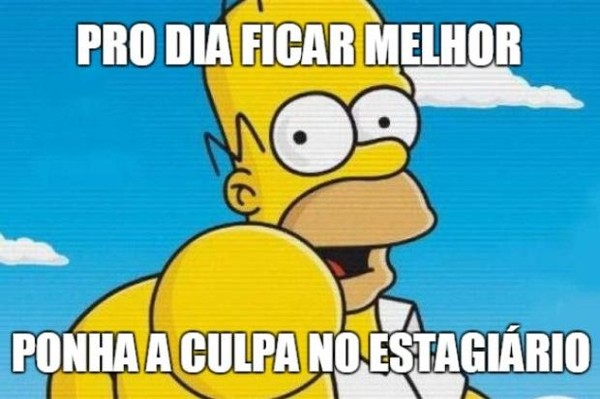

Este estudo explorou a classificação de tipos de vidro utilizando o conjunto de dados disponível na UCI (University of California, Irvine). O objetivo foi identificar a composição de vidro com base em variáveis químicas e físicas, distinguindo entre tipos comuns e especiais. O dataset foi pré-processado e normalizado utilizando o método MinMaxScaler, e algoritmos de agrupamento k-means foram projetados para separar as diferentes classes.


# **Metodologia**
<p style='text-align: justify;'>
O estudo foi conduzido de forma abrangente, revisitando cada etapa várias vezes para avaliar, ajustar e validar as hipóteses propostas.
</p>

Foram formuladas e testadas quatro hipóteses:
* (i) Hipótese 1: Dados com todos os atributos;
* (ii) Hipótese 2: Exclusão do atributo "Ca";
* (iii) Hipótese 3: Exclusão do atributo "RI";
* (iv) Hipótese 4: Aplicação do PCA com 6 componentes principais.

##Instalações de Bibliotecas

In [1]:
!pip install scikit-learn-extra
!pip install kneed

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.2 MB/s eta 0:00:00


##Importar Bibliotecas

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from kneed import KneeLocator

## Funções

### Carregar dataset

In [3]:
def carregar_dataset():
  url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
  columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
  data = pd.read_csv(url, header=None, names=columns)
  return data

###Remover colunas

In [4]:
def remover_colunas(array_colunas):
  X = data.drop(columns=array_colunas)
  print(X.head())
  return X

###Normalizar

In [5]:
def normalizar(X):
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)
  return X_scaled #scrollTo=Hip_tese_1_Todos_os_dados_

###Processar KMeans

In [6]:
def processarKMeans(K, X_scaled, max_iter = 300,  n_init = 10):
  kmeans = KMeans(n_clusters = K, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
  kmeans.fit(X_scaled)
  return kmeans

###Processar KMedoids

In [7]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

def processarKMedoids(X_scaled):
    param_grid = {
        'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
        'metric': ['euclidean', 'manhattan', 'cosine']
    }

    # Função de avaliação personalizada com Silhouette Score
    def silhouette_scorer(estimator, X):
        labels = estimator.fit_predict(X)
        return silhouette_score(X, labels)

    # Configurar GridSearchCV
    kmedoids = KMedoids(random_state=42)
    grid_search = GridSearchCV(
        kmedoids,
        param_grid,
        cv=3,  # Número de folds para validação cruzada
        scoring=silhouette_scorer,
        n_jobs=-1  # Usar múltiplos processadores para acelerar
    )

    # Realizar busca pelos melhores parâmetros
    grid_search.fit(X_scaled)

    # Melhor modelo encontrado
    best_model = grid_search.best_estimator_

    # Treinar o modelo com os melhores parâmetros
    best_model.fit(X_scaled)

    # Imprimir os melhores parâmetros e Silhouette Score
    print(f"Melhor combinação de parâmetros: {grid_search.best_params_}")
    print(f"Silhouette Score para o melhor modelo: {silhouette_score(X_scaled, best_model.labels_):.2f}")

    # Retornar o modelo treinado e os rótulos dos clusters
    return best_model, best_model.labels_


###Predição

In [8]:
def predicao(kmeans):
  '''fazer a predição dos clusters'''
  clusters = kmeans.labels_
  return clusters

###Visualizar PCA

In [9]:
def visualizar_pca(X_scaled):
  pca = PCA(n_components=2)
  X_pca_2d = pca.fit_transform(X_scaled)

  plt.figure(figsize=(8, 6))
  scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters, cmap='tab10', s=50, alpha=0.7)
  plt.colorbar(scatter, label='Cluster')
  plt.title("Visualização 2D dos Clusters com PCA")
  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2")
  plt.show()

  # 3D PCA
  pca_3d = PCA(n_components=3)
  X_pca_3d = pca_3d.fit_transform(X_scaled)

  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(
      X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
      c=clusters, cmap='tab10', s=50, alpha=0.7
  )
  ax.set_title('Visualização 3D dos Clusters com PCA')
  ax.set_xlabel('Principal Component 1')
  ax.set_ylabel('Principal Component 2')
  ax.set_zlabel('Principal Component 3')
  plt.show()

###Gerar PCA

In [10]:
def gerar_pca(X_scaled):
  pca = PCA(n_components=4)
  X_pca = pca.fit_transform(X_scaled)
  '''
  # Variância explicada por componente
  explained_variance_ratio = pca.explained_variance_ratio_

  # Plotar a variância explicada cumulativa
  plt.figure(figsize=(8, 6))
  plt.plot(np.cumsum(explained_variance_ratio), marker='o')
  plt.xlabel('Número de Componentes Principais')
  plt.ylabel('Variância Explicada Acumulada')
  plt.title('PCA - Variância Explicada Acumulada')
  plt.grid()
  plt.show()'''
  return X_pca

###Verificar Convergência

In [11]:
silhouette_scores = []

def verificar_convergencia(X_scaled, max_iter, n_init):
  wcss = []
  silhouette_scores = []
  iterations = []  # Lista para armazenar o número de iterações
  range_clusters = range(2, 11)

  for k in range_clusters:
      kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=max_iter, n_init=n_init, random_state=42)
      print(f"Rodando para k = {k}")
      kmeans.fit(X_scaled)
      wcss.append(kmeans.inertia_)
      silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
      iterations.append(kmeans.n_iter_)  # Adicionar o número de iterações na lista

  # Mostrar as iterações para cada k
  for k, iters in zip(range_clusters, iterations):
      print(f"Para k = {k}, convergiu em {iters} iterações")

  return silhouette_scores

###Avaliação - Silhouette e Cotovelo

In [12]:
def silhouette_cotovelo(X_scaled):
    # Intervalo de clusters
    range_clusters = range(2, 11)

    # WCSS para o método do cotovelo
    wcss = []
    for k in range_clusters:
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Determinar ponto do cotovelo
    knee_locator = KneeLocator(range_clusters, wcss, curve='convex', direction='decreasing')
    optimal_k_elbow = knee_locator.knee
    print(f"Número ideal de clusters pelo método do cotovelo: {optimal_k_elbow}")

    # Silhouette Scores
    silhouette_scores = []
    for k in range_clusters:
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(X_scaled)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

    # Determinar o k com maior Silhouette Score
    optimal_k_silhouette = range_clusters[np.argmax(silhouette_scores)]
    print(f"Número ideal de clusters pelo Silhouette Score: {optimal_k_silhouette}")

    # Plotar os resultados
    plt.figure(figsize=(12, 6))

    # Método do Cotovelo (WCSS)
    plt.subplot(1, 2, 1)
    plt.plot(range_clusters, wcss, marker='o', label='WCSS', color='blue')
    plt.axvline(x=optimal_k_elbow, color='red', linestyle='--', label=f'Cotovelo: k={optimal_k_elbow}')
    plt.title("Método do Cotovelo (WCSS)")
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("WCSS (Inertia)")
    plt.legend()

    # Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(range_clusters, silhouette_scores, marker='o', label='Silhouette Score', color='orange')
    plt.axvline(x=optimal_k_silhouette, color='green', linestyle='--', label=f'Silhouette: k={optimal_k_silhouette}')
    plt.title("Silhouette Score")
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.legend()

    plt.tight_layout()
    plt.show()

###Gerar Gráfico

In [13]:
def grafico(clusters):
  # Perform PCA for dimensionality reduction before plotting
  pca = PCA(n_components=2) # Create a PCA object with 2 components
  X_pca = pca.fit_transform(X_scaled)  # Apply PCA to your scaled data and store the result in X_pca

  # Visualizar clusters em 2D
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100)
  plt.title("Clusters K-means Projetados em 2D")
  plt.xlabel("Componente Principal 1")
  plt.ylabel("Componente Principal 2")
  plt.show()

###Visualizar o Métodos Cotovelo e Silhouette

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
Número ideal de clusters pelo método do cotovelo: 5
Número ideal de clusters pelo Silhouette Score: 3


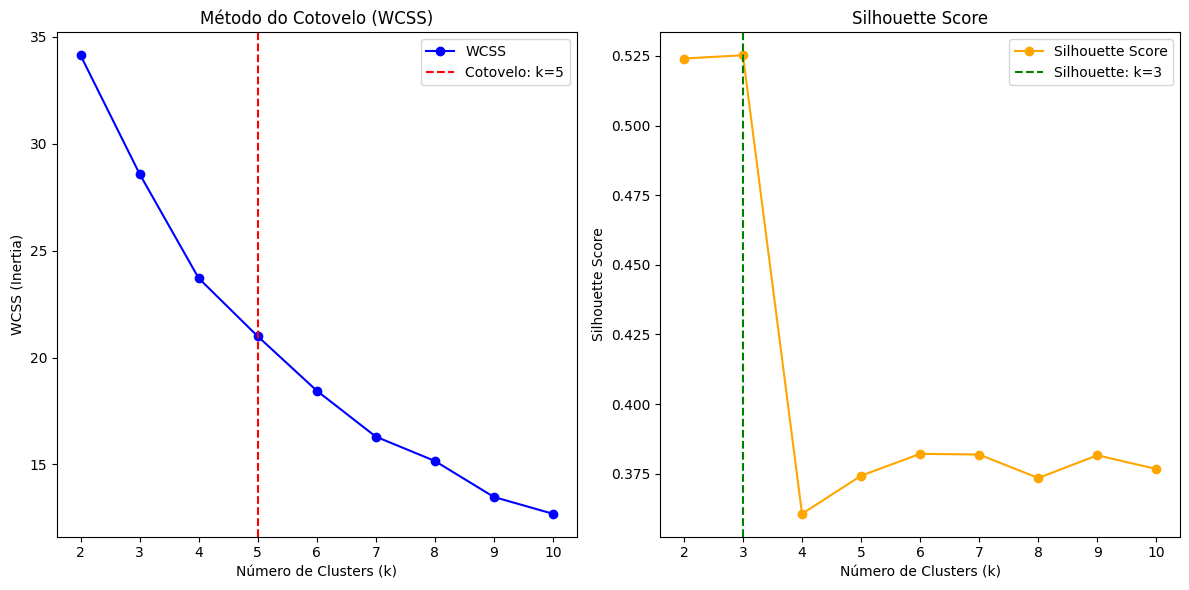

In [14]:
data = carregar_dataset()
X = remover_colunas(['Id','Type'])
X_scaled = normalizar(X)
silhouette_cotovelo(X_scaled)

###Distribuição dos Clusters

In [15]:
def distribuicao_clusters():

  # Comparar clusters com as classes originais
  if 'Type' in data.columns:
      comparison = pd.crosstab(data['Type'], data['Cluster'], rownames=['Classe'], colnames=['Cluster'])
      print(comparison)

  # Criar tabela de contingência
  comparison = pd.crosstab(data['Type'], data['Cluster'], rownames=['Classe'], colnames=['Cluster'])

  # Configurar o tamanho da figura
  plt.figure(figsize=(10, 6))

  # Criar o heatmap com anotações
  sns.heatmap(comparison, annot=True, fmt='d', cmap='Blues', cbar=True)

  # Adicionar títulos e rótulos
  plt.title('Distribuição de Clusters por Classe Original', fontsize=14)
  plt.xlabel('Cluster', fontsize=12)
  plt.ylabel('Classe Original', fontsize=12)

  # Mostrar o gráfico
  plt.tight_layout()
  plt.show()

###Calcular Silhouette

In [16]:
def calcular_silhouette():
  # Calcular Silhouette Score
  silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
  print(f"Silhouette Score: {silhouette_avg:.2f}")

### Calcular Innerce

In [17]:
def calcular_inercia():
  # Inertia (menor é melhor)
  print(f"Inertia (WCSS): {kmeans.inertia_:.2f}")

###Calcular Davies-Bouldin

In [18]:
def calcular_davies_bouldin(X_scaled, kmeans):
  '''Davies-Bouldin Index:
       Nova métrica que mede compactação intra-cluster e
       separação inter-cluster.Valores menores indicam
       clusters mais bem definidos. Exemplos de Valores:
       DBI < 1: Ótima qualidade de clustering. Os clusters
                são bem compactos e bem separados.
       DBI entre 1 e 2: Clusters razoáveis, mas com
                        possibilidade de melhorar a definição.
       DBI > 2: Clusters problemáticos, com muita sobreposição
                ou dispersão.
  '''
  db_index = davies_bouldin_score(X_scaled, kmeans.labels_)
  print(f"Davies-Bouldin Index: {db_index:.2f}")
  return db_index

###Calcular ARI

In [19]:
def calcular_ari(data, kmeans):
  '''Calcular ARI'''
  ari_score = adjusted_rand_score(data['Type'], kmeans.labels_)
  print(f"Adjusted Rand Index (ARI): {ari_score:.2f}")
  return ari_score

###Calcular NMI

In [20]:
def calcular_nmi(data, kmeans):
  '''Calcular NMI'''
  nmi_score = normalized_mutual_info_score(data['Type'], kmeans.labels_)
  print(f"Normalized Mutual Information (NMI): {nmi_score:.2f}")
  return nmi_score

## Hipótese 1 -> (Todos os dados)

In [21]:
data = carregar_dataset()
X = remover_colunas(['Id','Type'])
X_scaled = normalizar(X)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0


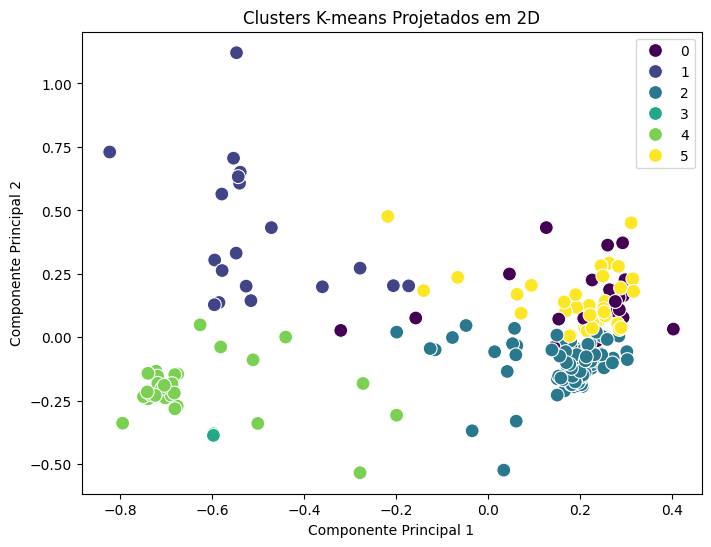

In [22]:
K = 6
kmeans = processarKMeans(K, X_scaled, max_iter=100, n_init=20)
clusters = predicao(kmeans)
grafico(clusters)

In [23]:
h1_davies_bouldin = calcular_davies_bouldin(X_scaled, kmeans)
h1_davies_bouldin

Davies-Bouldin Index: 0.97


0.9679482721764084

In [24]:
h1_ari = calcular_ari(data, kmeans)
h1_ari

Adjusted Rand Index (ARI): 0.17


0.16876453275091882

In [25]:
h1_nmi = calcular_nmi(data, kmeans)
h1_nmi


Normalized Mutual Information (NMI): 0.33


0.32659042421095724

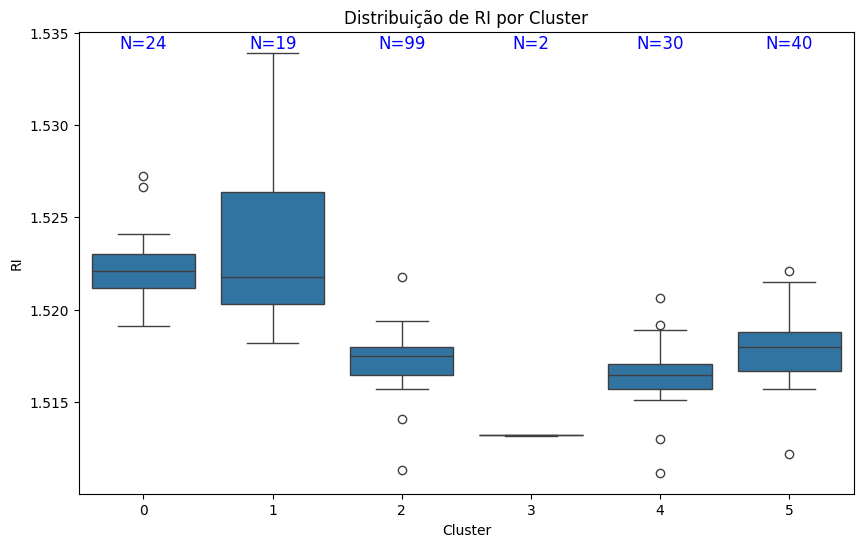

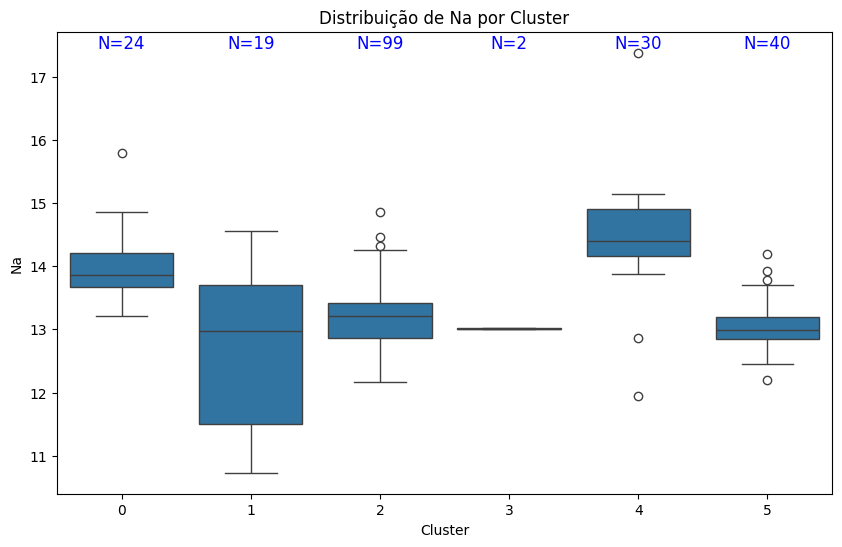

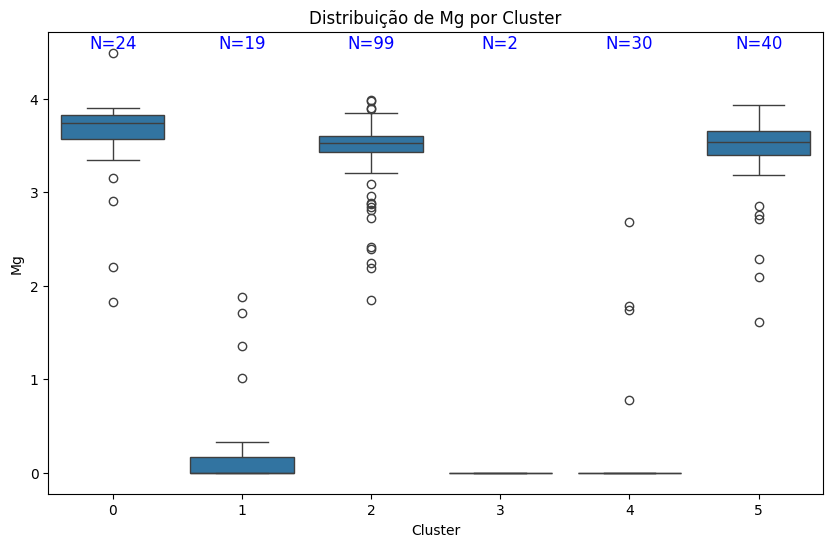

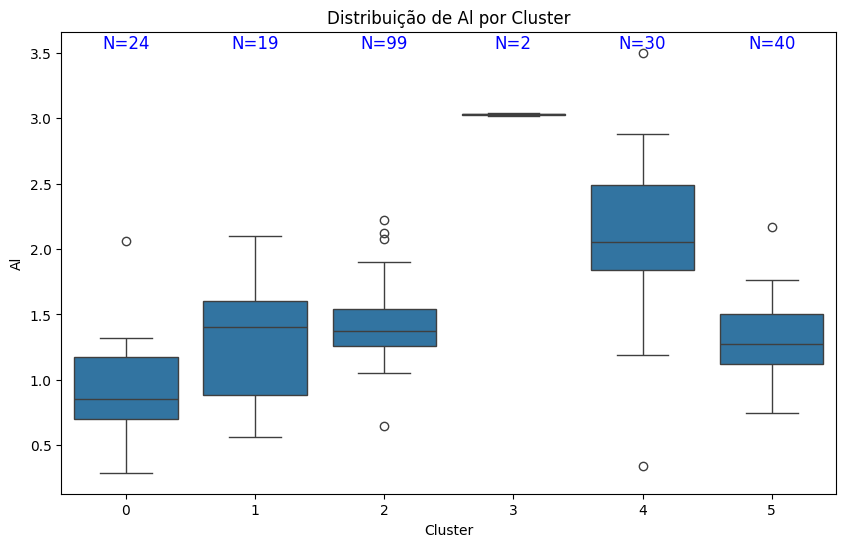

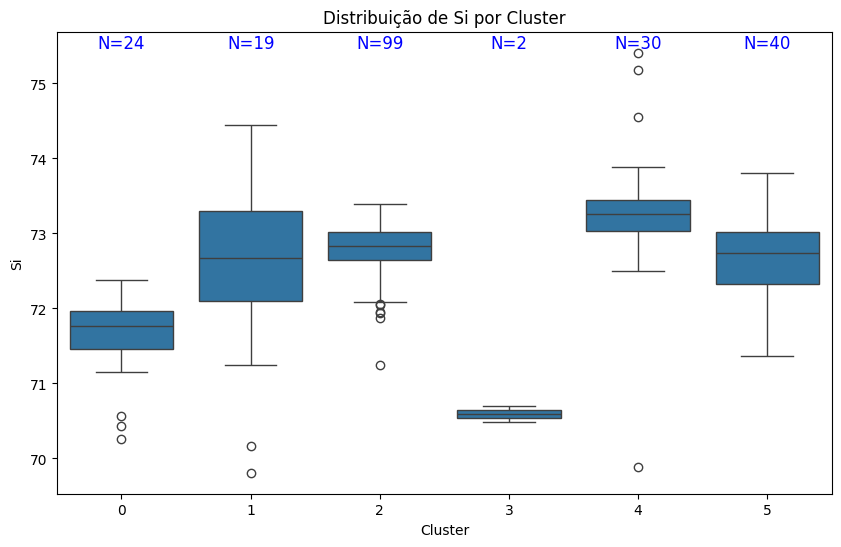

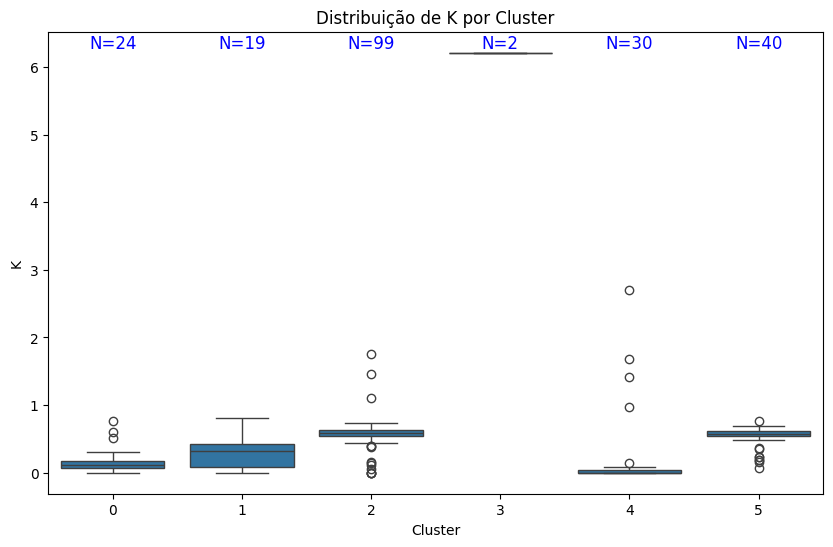

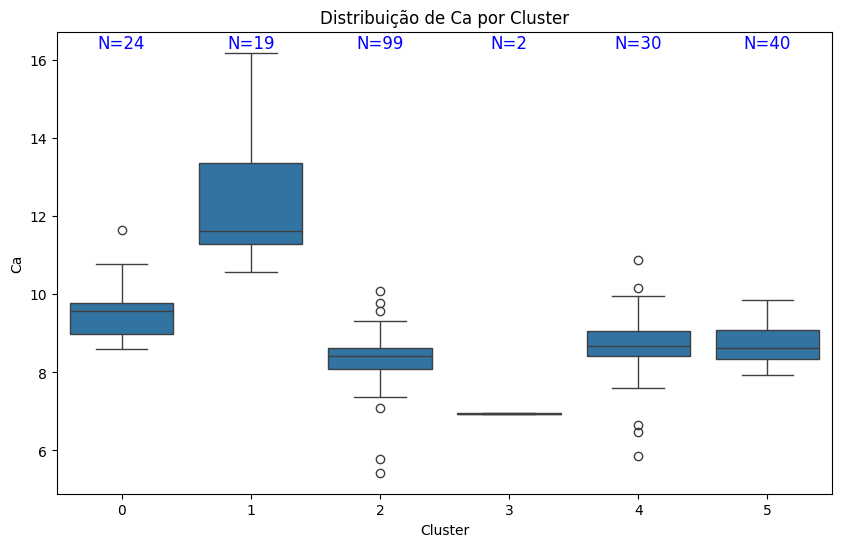

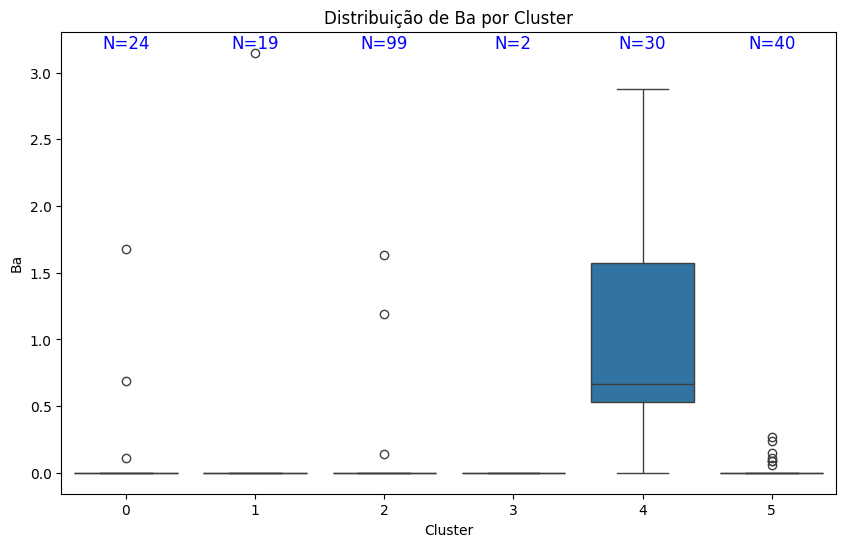

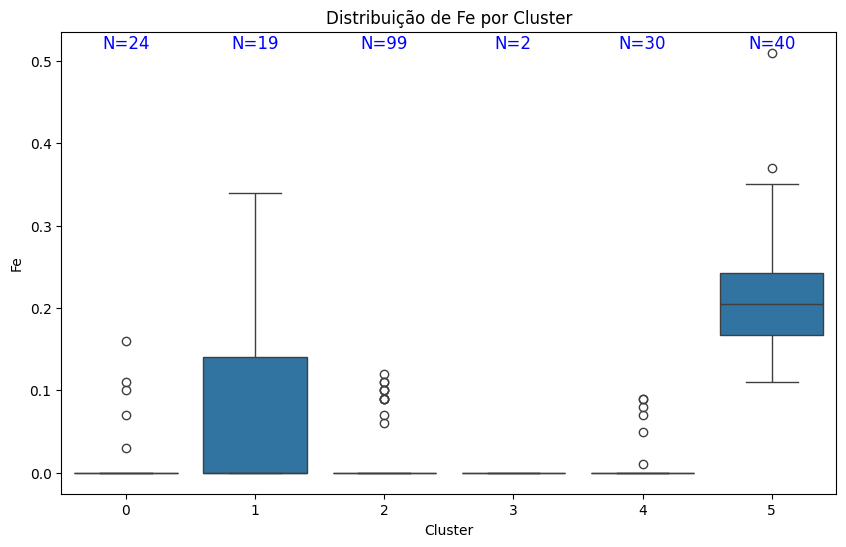

In [26]:
# Adicionar os clusters ao dataset original
clusters = predicao(kmeans)
data['Cluster'] = clusters

# Calcular a contagem de elementos em cada cluster
cluster_counts = data['Cluster'].value_counts().sort_index()

# Analisar a relação das variáveis com os clusters usando boxplots
for coluna in X.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=coluna, data=data)

    # Adicionar contagem de elementos como texto no gráfico
    for cluster, count in cluster_counts.items():
        plt.text(x=cluster, y=data[coluna].max(), s=f'N={count}',
                 ha='center', va='bottom', fontsize=12, color='blue')

    # Título e exibição do gráfico
    plt.title(f'Distribuição de {coluna} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(coluna)
    plt.show()


In [27]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


                 Id        RI         Na        Mg        Al         Si  \
Cluster                                                                   
0         76.833333  1.522161  13.986250  3.552500  0.921250  71.608333   
1        139.210526  1.523584  12.726316  0.330526  1.297895  72.484211   
2         86.373737  1.517268  13.213838  3.435051  1.420000  72.770000   
3        172.500000  1.513185  13.010000  0.000000  3.030000  70.590000   
4        197.466667  1.516380  14.483667  0.232667  2.132333  73.261667   
5         92.400000  1.518073  13.077750  3.397500  1.295750  72.706000   

                K         Ca        Ba        Fe      Type  
Cluster                                                     
0        0.171667   9.550000  0.103333  0.019583  2.000000  
1        0.276842  12.501579  0.165789  0.078947  3.315789  
2        0.569596   8.362121  0.029899  0.011414  2.030303  
3        6.210000   6.945000  0.000000  0.000000  5.000000  
4        0.239667   8.631333  0.9

  Features mais coesas por clusters
  critério olhamos para as gráficos e as features que apresentaram menor variância por clusters foram as aceitas para explicar as formações dos clusters.
  - cluster 0---> K
  - cluster 1---> Ba
  - cluster 2--->Al, Si, Ca
  - cluster 3--->Si causou maior variância, mostrando que não foi o responsável por membros neste cluster (apenas 2 elementos)
  - cluster 4---> RI,Mg ,K, Fe
  - cluster 5---> Na

ri ; 4<0<= 2<<5 ->variabilidade por clusters

Na; 5<<<2=0<<<4<<<<1

Mg; 4<<1<<5<<0<<2

Al; 2<<<<5<<<0<<1=<4

si; 2<=4<0<<5<<<1

K; 4<0<<2=5<<1

Ca; 2<<4<5<<0<<<<1

Ba; 1<0<=2<5<<<4

Fe; 4<2<0<<<5<<<<1

In [28]:
# clusters é a variável que contém os rótulos atribuídos pelo KMeans
clusters = kmeans.labels_

# Contar a quantidade de elementos por cluster
unique, counts = np.unique(clusters, return_counts=True)

# Mostrar o resultado
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} elementos")


Cluster 0: 24 elementos
Cluster 1: 19 elementos
Cluster 2: 99 elementos
Cluster 3: 2 elementos
Cluster 4: 30 elementos
Cluster 5: 40 elementos


In [29]:
# clusters contém os rótulos do KMeans
clusters = kmeans.labels_

# Adicionar os rótulos dos clusters ao DataFrame original
data['Cluster'] = clusters

# Mostrar elementos de um cluster específico, por exemplo, Cluster 2
cluster_especifico = 3  # Substitua pelo número do cluster que deseja
elementos_cluster = data[data['Cluster'] == cluster_especifico]

# Exibir os elementos
print(f"Elementos do Cluster {cluster_especifico}:")
print(elementos_cluster)


Elementos do Cluster 3:
      Id       RI     Na   Mg    Al     Si     K    Ca   Ba   Fe  Type  \
171  172  1.51316  13.02  0.0  3.04  70.48  6.21  6.96  0.0  0.0     5   
172  173  1.51321  13.00  0.0  3.02  70.70  6.21  6.93  0.0  0.0     5   

     Cluster  
171        3  
172        3  


## Hipótese 2 -> (Todos os dados - "CA")


In [30]:
data = carregar_dataset()
X = remover_colunas(['Id','Type','Ca'])
X_scaled = normalizar(X)

        RI     Na    Mg    Al     Si     K   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  0.0  0.0


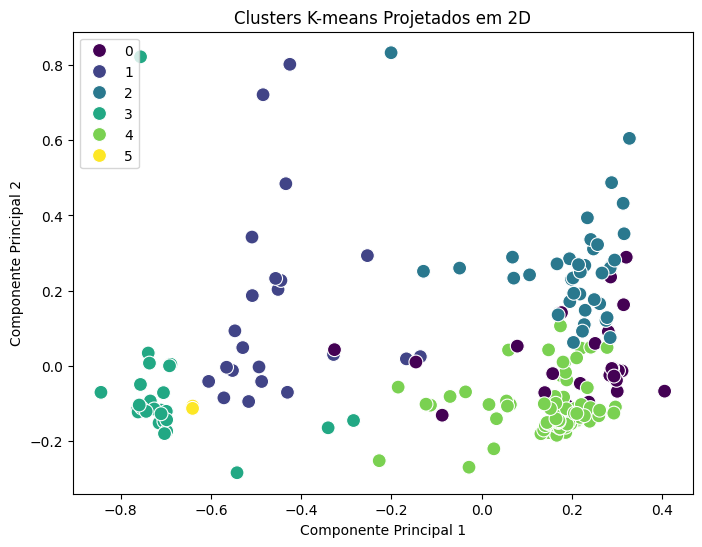

In [31]:
K = 6
kmeans = processarKMeans(K, X_scaled, max_iter=100, n_init=20)
clusters = predicao(kmeans)
grafico(clusters)

In [32]:
h2_davies_bouldin = calcular_davies_bouldin(X_scaled, kmeans)
h2_davies_bouldin

Davies-Bouldin Index: 1.02


1.0230560933625596

In [33]:
h2_ari = calcular_ari(data, kmeans)
h2_ari

Adjusted Rand Index (ARI): 0.17


0.16677438940591835

In [34]:
h2_nmi = calcular_nmi(data, kmeans)
h2_nmi

Normalized Mutual Information (NMI): 0.32


0.316138391501646

##Hipótese 3 -> (Todos - "RI")

In [35]:
data = carregar_dataset()
X = remover_colunas(['Id','Type','RI'])
X_scaled = normalizar(X)

      Na    Mg    Al     Si     K    Ca   Ba   Fe
0  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0


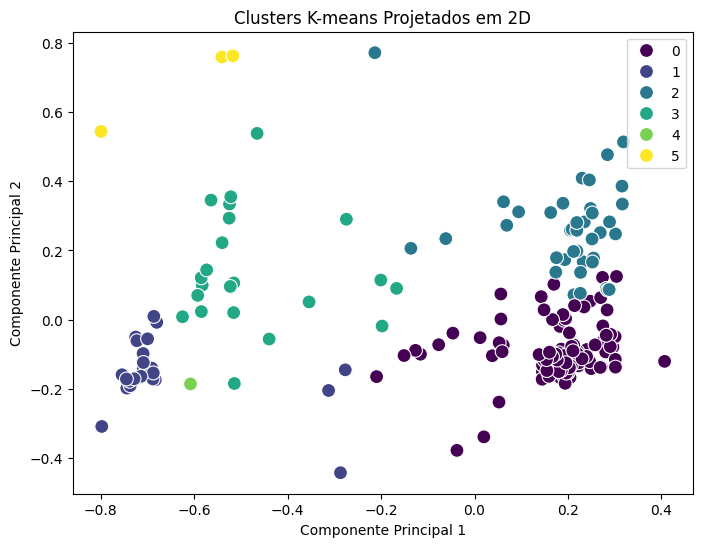

In [36]:
K = 6
kmeans = processarKMeans(K, X_scaled, max_iter=100, n_init=20)
clusters = predicao(kmeans)
grafico(clusters)

In [37]:
h3_davies_bouldin = calcular_davies_bouldin(X_scaled, kmeans)
h3_davies_bouldin

Davies-Bouldin Index: 0.98


0.9792668473323802

In [38]:
h3_ari = calcular_ari(data, kmeans)
h3_ari

Adjusted Rand Index (ARI): 0.19


0.18751404334104985

In [39]:
h3_nmi = calcular_nmi(data, kmeans)
h3_nmi

Normalized Mutual Information (NMI): 0.36


0.3568284241161865

##Hipótese 4 -> (Aplicar o PCA)

In [40]:
data = carregar_dataset()
X = remover_colunas(['Id','Type'])
X_scaled = normalizar(X)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0


In [41]:
X_scaled = gerar_pca(X_scaled)

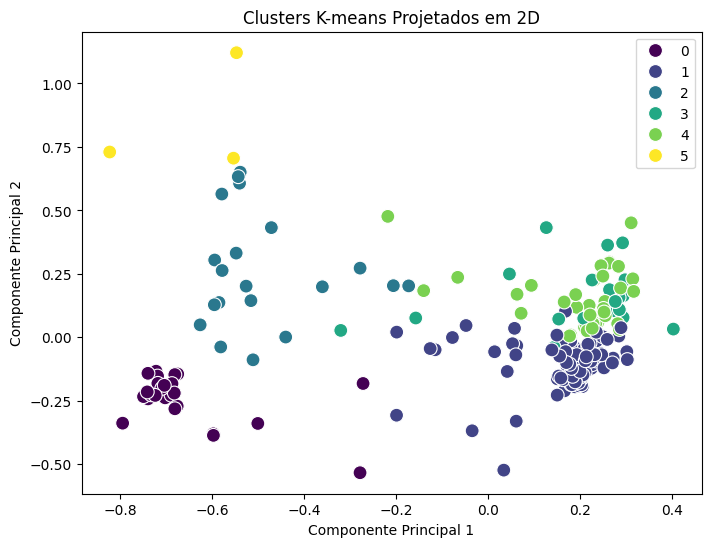

In [42]:
K = 6
kmeans = processarKMeans(K, X_scaled, max_iter=100, n_init=20)
clusters = predicao(kmeans)
grafico(clusters)

In [43]:
h4_davies_bouldin = calcular_davies_bouldin(X_scaled, kmeans)
h4_davies_bouldin

Davies-Bouldin Index: 0.90


0.904975703443565

In [44]:
h4_ari = calcular_ari(data, kmeans)
h4_ari

Adjusted Rand Index (ARI): 0.16


0.16091960193166363

In [45]:
h4_nmi = calcular_nmi(data, kmeans)
h4_nmi

Normalized Mutual Information (NMI): 0.31


0.3071296428963046

#Resultado e Discussões

In [46]:
# Definir a precisão de exibição
pd.options.display.float_format = "{:.4f}".format

# Criar a tabela com as métricas e valores formatados
tabela_resumo = pd.DataFrame({
    "Métrica": ["Davies-Bouldin", "Adjusted Rand Index (ARI)", "Normalized Mutual Information (NMI)"],
    "H1": [h1_davies_bouldin, h1_ari, h1_nmi],
    "H2": [h2_davies_bouldin, h2_ari, h2_nmi],
    "H3": [h3_davies_bouldin, h3_ari, h3_nmi],
    "H4": [h4_davies_bouldin, h4_ari, h4_nmi]
})

# Estilizar a tabela para melhorar a aparência
tabela_estilizada = tabela_resumo.style.format({
    'H1': '{:.4f}',
    'H2': '{:.4f}',
    'H3': '{:.4f}',
    'H4': '{:.4f}'
})

# Exibir a tabela estilizada
tabela_estilizada

,Métrica,H1,H2,H3,H4
0,Davies-Bouldin,0.9679,1.0231,0.9793,0.9050
1,Adjusted Rand Index (ARI),0.1688,0.1668,0.1875,0.1609
2,Normalized Mutual Information (NMI),0.3266,0.3161,0.3568,0.3071


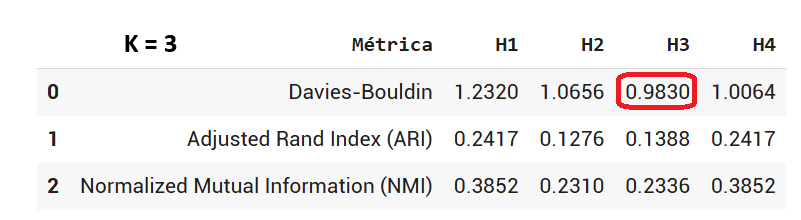

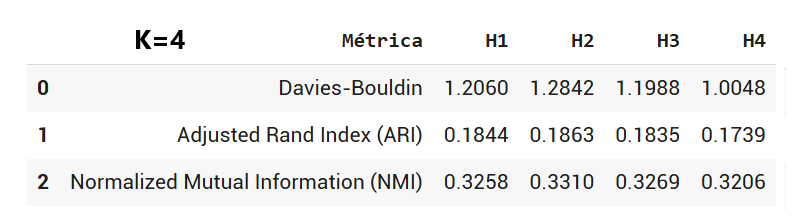

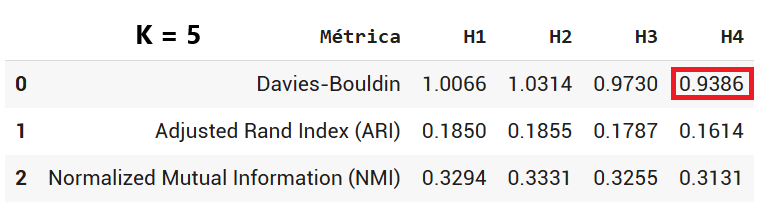

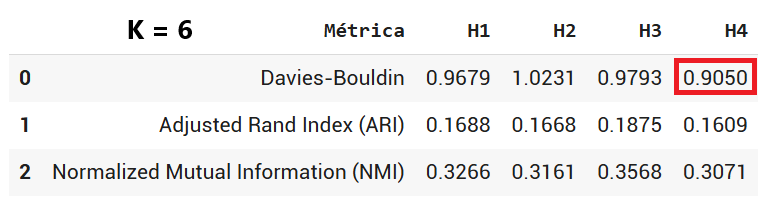

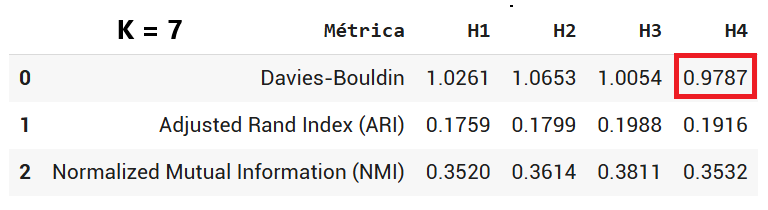

# **Conclusão**

<p style='text-align: justify;'>
Os resultados destacaram o modelo gerado pela Hipótese 4 como o mais eficaz, atingindo um índice de Davies-Bouldin (DBI) de 0,9050.
</p>